<a href="https://colab.research.google.com/github/Debaraj-senapati/stock_price_prediction/blob/main/stock_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 17.7254


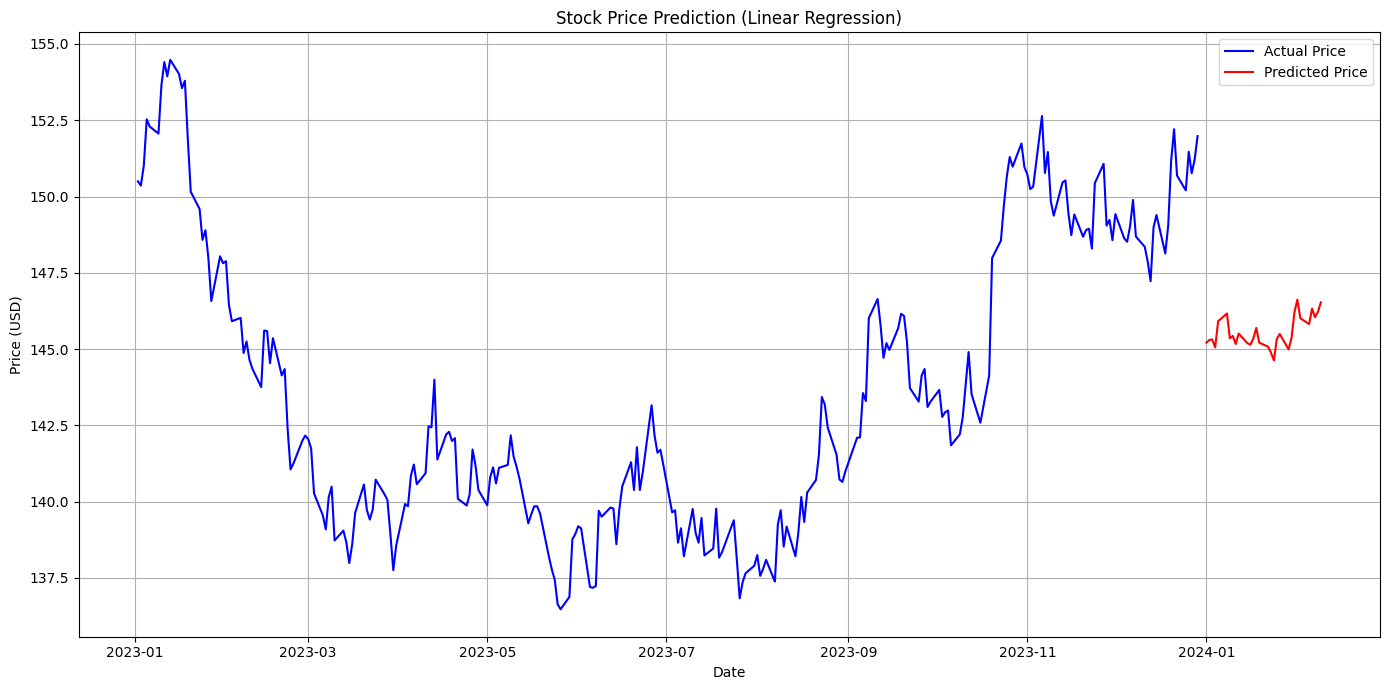

Predicted prices saved to 'SAMPLE_SMOOTH_STOCK.csv'


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#  Load CSV
data = pd.read_csv("SAMPLE_AAPL.csv")  # Replace with your file path

#  Parse Date and Set Index
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)

#   Use only Close prices
data = data[["Close"]]

# Create future prediction column (e.g. next 30 days)
future_days = 30
data["Prediction"] = data["Close"].shift(-future_days)

# Prepare features (X) and target (y) as DataFrame to preserve feature names
X = data.drop("Prediction", axis=1)[:-future_days]
y = data["Prediction"][:-future_days]

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

#  Evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.4f}")

#  Predict future prices
X_future = data.drop("Prediction", axis=1)[-future_days:]
future_predictions = model.predict(X_future)

#  Create future dates for plotting
last_date = data.index[-1]
future_dates = pd.date_range(last_date, periods=future_days + 1, freq="B")[1:]
prediction_df = pd.DataFrame(future_predictions, index=future_dates, columns=["Predicted Price"])

#  Plot
plt.figure(figsize=(14, 7))
plt.plot(data["Close"], label="Actual Price", color="blue")
plt.plot(prediction_df, label="Predicted Price", color="red")
plt.title("Stock Price Prediction (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save predicted prices to CSV
prediction_df.to_csv("SAMPLE_SMOOTH_STOCK.csv")
print("Predicted prices saved to 'SAMPLE_SMOOTH_STOCK.csv'")
